<a id='INDEX'></a>
# Índice de la notebook


[1) Análisis exploratorio del dataset (EDA)](#EDA)

[2) Modelo de Naive Bayes](#NB)

[3) Modelo de Random Forest](#RF)

[4) Modelo de XGBoost](#XGB)

[5) Export de modelo final](#PKL)

[6) Comparacion de modelos y comentarios finales](#SUM)

In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

### Kaggle Dataset:
<a href="https://www.kaggle.com/shubh0799/churn-modelling">Link a origen</a>

In [3]:
%matplotlib inline

In [4]:
path = "churn_modelling.csv"
data = pd.read_csv(path)
data.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


---
<a id='EDA'></a>
# ANALISIS EXPLORATORIO DE DATOS

Analizamos las relaciones entre columnas, y el comportamiendo de cada una de ellas por separado.
Evaluamos ademas, columnas de interacción


<font size="1">[volver al índice](#INDEX)</font>

---

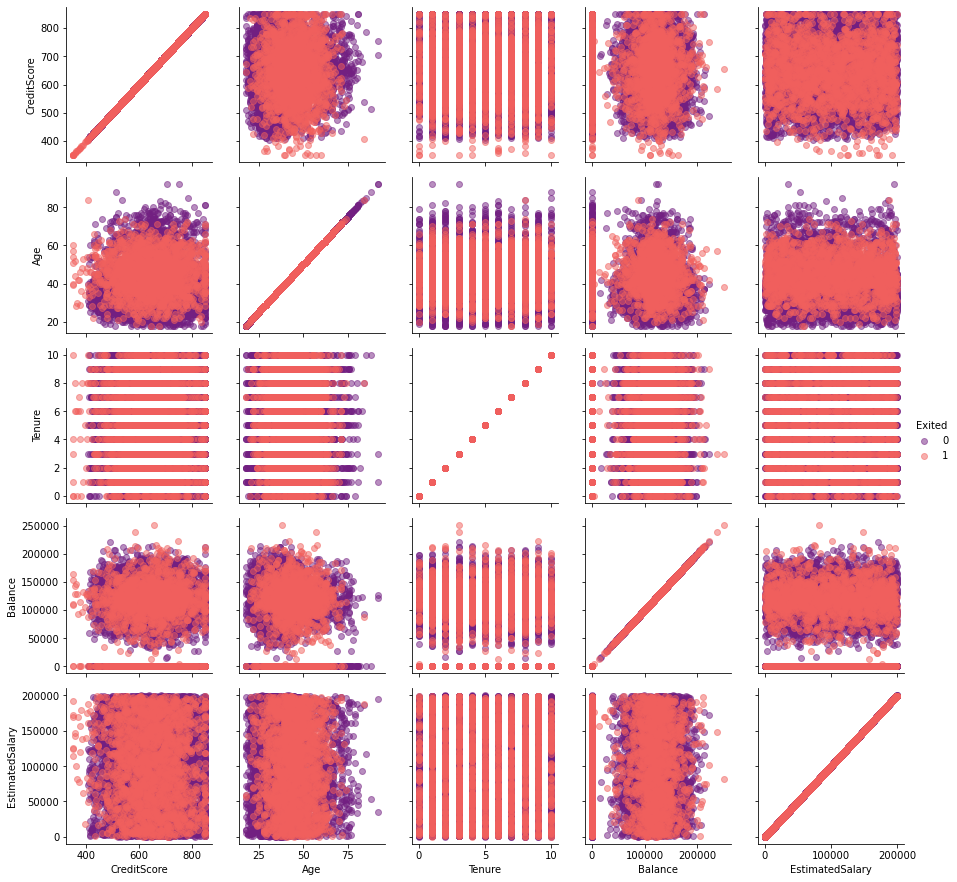

In [7]:
g = sns.PairGrid(data, vars=['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary'],
                 hue='Exited', palette='magma')

g.map(plt.scatter, alpha=0.5)
g.add_legend();

In [8]:
print("Ratio Churn: ", data.Exited.sum()/data.Exited.count())
print("DATASET DESBALANCEADO")

Ratio Churn:  0.2037
DATASET DESBALANCEADO


In [9]:
def eda1(df,column):
    #tomo un slice de los casos positivos
    plot_data_exited= data[data.Exited==1][column]
    
    #Seteando columna a analizar
    plot_data=data[column]
    axis_leg=column

    #Print de un describe
    print("Describe: \n")
    print(plot_data.describe())

    #Histograma
    print("\nHistograma: \n")
    plt.figure(figsize=(10,4))
    ax = plt.axes()
    ax.hist(plot_data, color='purple')
    ax.hist(plot_data_exited, color='salmon')
    #ax.grid(axis='y', color='grey')
    plt.show()

    #BoxPlot
    print("\nBoxPlot: \n")
    sns.set_style('darkgrid')
    plt.figure(figsize=(10, 4))
    sns.boxplot(data=data, x="Exited", y=axis_leg, palette="magma")
    plt.xlabel("Exited"); plt.ylabel(axis_leg);plt.title("Box Plot")
    plt.show()

<AxesSubplot:>

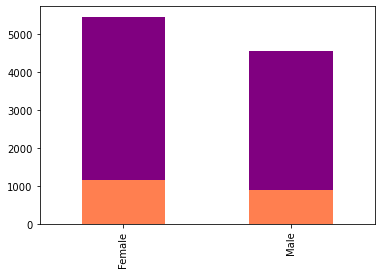

In [10]:
data['Gender'].value_counts().plot(kind='bar', color = 'purple')
data[data.Exited==1]['Gender'].value_counts().plot(kind='bar', color='coral')

Describe: 

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

Histograma: 



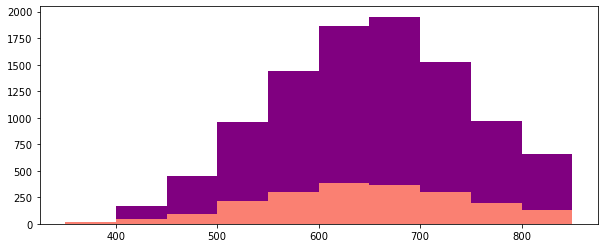


BoxPlot: 



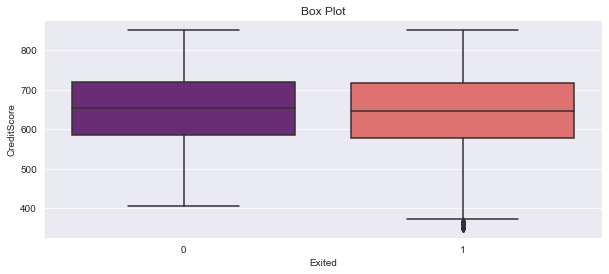

In [11]:
eda1(data,"CreditScore")

Describe: 

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64

Histograma: 



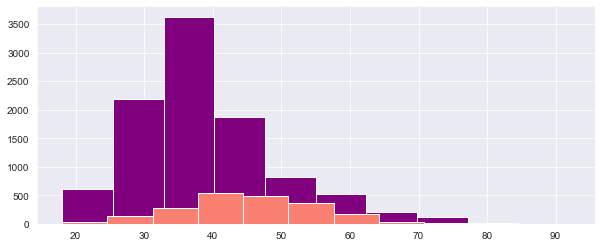


BoxPlot: 



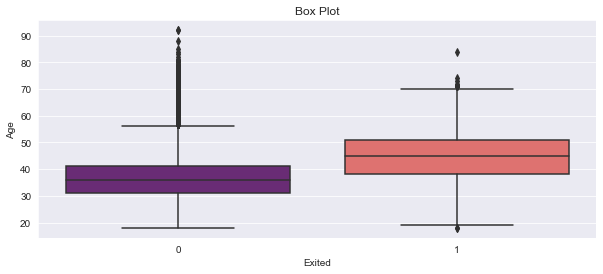

In [12]:
eda1(data,"Age")

Describe: 

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64

Histograma: 



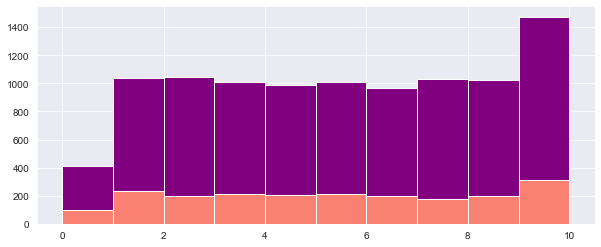


BoxPlot: 



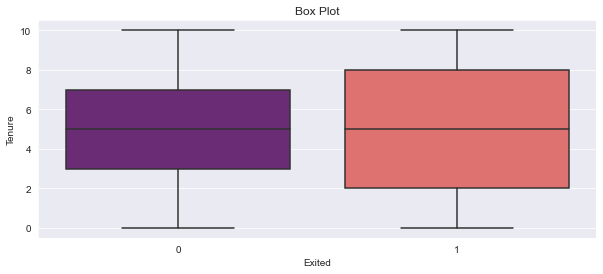

In [13]:
eda1(data,"Tenure")

Describe: 

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

Histograma: 



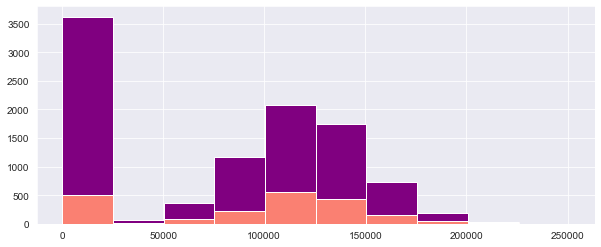


BoxPlot: 



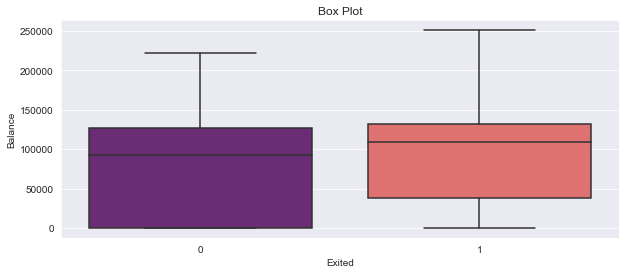

In [14]:
eda1(data,"Balance")

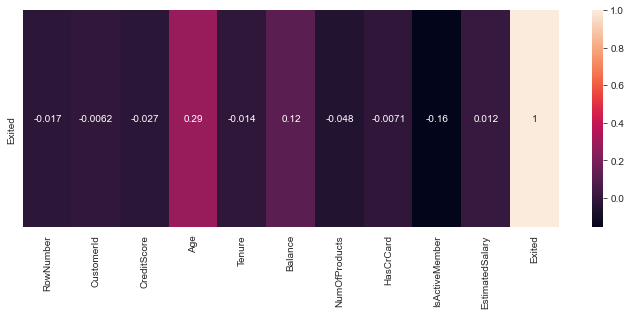

In [15]:
plt.figure(figsize=(12, 4)) # plotting correlation heatmap 
dataplot = sns.heatmap(data.corr().loc[['Exited']], annot=True)    # displaying heatmap plt.show()


---
### Creamos columnas de interacción <br>
Observando las columnas con correlación a la variable target, decidimos crear y testear columnas de interacción


In [16]:
data['relative_Tenure']=data.Tenure*data.Age

In [17]:
data['balance_t_salary']=data.Balance*data.EstimatedSalary

In [18]:
data['balance_zero']= data['Balance'].apply(lambda x: 1 if x==0 else 0)

Describe: 

count    1.000000e+04
mean     7.701410e+09
std      8.452814e+09
min      0.000000e+00
25%      0.000000e+00
50%      4.962826e+09
75%      1.380638e+10
max      4.151798e+10
Name: balance_t_salary, dtype: float64

Histograma: 



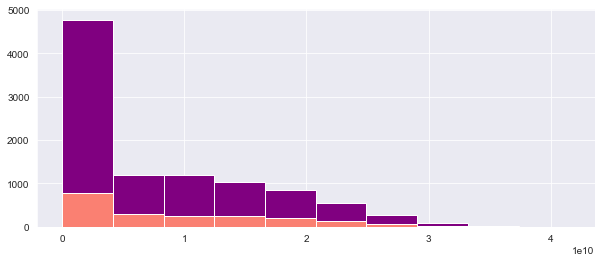


BoxPlot: 



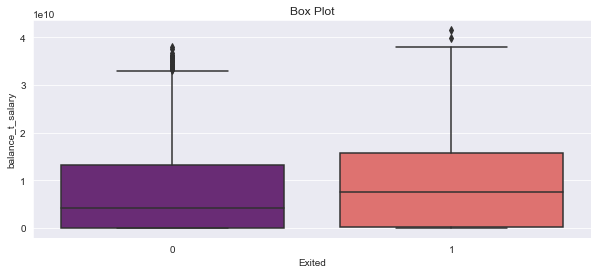

In [19]:
eda1(data,'balance_t_salary')

Describe: 

count    10000.000000
mean       194.804000
std        127.939996
min          0.000000
25%         90.000000
50%        180.000000
75%        280.000000
max        880.000000
Name: relative_Tenure, dtype: float64

Histograma: 



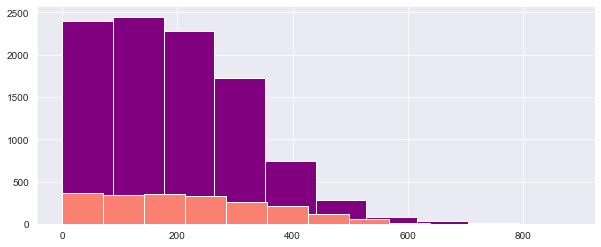


BoxPlot: 



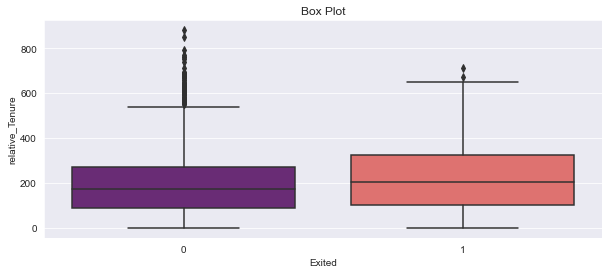

In [20]:
eda1(data,'relative_Tenure')

<AxesSubplot:>

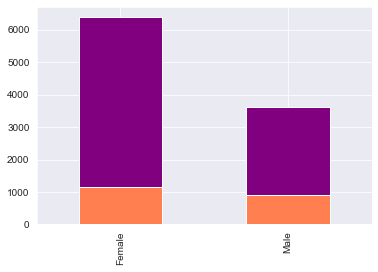

In [21]:
data['balance_zero'].value_counts().plot(kind='bar', color = 'purple')
data[data.Exited==1]['Gender'].value_counts().plot(kind='bar', color='coral')

---
<a id='NB'></a>
# NAIVE BAYES
###  - Baseline Model

Tomamos este modelo simple como referencia para la performance de las posteriores iteraciones
Sobre estos resultados intentaremos mejorar

<font size="1">[volver al índice](#INDEX)</font>

---

In [22]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'relative_Tenure',
       'balance_t_salary', 'balance_zero'],
      dtype='object')

In [23]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
removed_features = ['RowNumber','CustomerId','Surname','Geography','Gender','relative_Tenure','balance_t_salary','balance_zero','Exited']

In [25]:
#Armamos los feature y target:
X = data.drop(removed_features, axis = 1)
X_country = pd.get_dummies(data.Geography, drop_first = True, prefix ="Country")
X_gender = pd.get_dummies(data.Gender, drop_first = True, prefix ="Gender")
X_gender
X = pd.concat([X, X_country, X_gender ], axis=1)
y = data.Exited


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

#SCALER
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [26]:
# Modelo
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [27]:
param_grid = dict( var_smoothing = np.logspace(0,-9, num = 100) )
print(param_grid)

{'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.87381742e-05, 1.51991108e-05, 1.23284674e-05, 1.00

**Esquema de validación cruzada:** definimos la cantidad de folds, con el método `StratifiedKFold`

In [28]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

---
##### Para nuestro caso, buscamos optimizar lo más posible el 'recall' sin descuidar la 'precision'
##### Con esto en mente, nuestra exploración inicial es usando el scoring 'f1' el cual pondera en partes iguales las mencionadas metricas
---

In [29]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(nb, param_grid, cv=folds, scoring='f1')

In [30]:
grid.fit(X_train_scl, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.336699...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1')

In [31]:
grid.best_params_['var_smoothing']

0.0012328467394420659

In [32]:
best_var = grid.best_params_['var_smoothing']

In [33]:
model_01 = GaussianNB(var_smoothing = best_var )

In [34]:
#Entreno
model_01.fit(X_train_scl, y_train)

GaussianNB(var_smoothing=0.0012328467394420659)

In [35]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [36]:
print('Recall Train :',recall_score(y_train, model_01.predict(X_train_scl)))

Recall Train : 0.3548387096774194


In [37]:
y_pred = model_01.predict(X_test_scl)

In [38]:
print('Recall Test :',recall_score(y_test,y_pred))

Recall Test : 0.3281853281853282


In [39]:
print('Precision Train :',precision_score(y_train,model_01.predict(X_train_scl)))

Precision Train : 0.6267441860465116


In [40]:
print('Precision Test :',precision_score(y_test,y_pred))

Precision Test : 0.5964912280701754


In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(34.0, 0.5, 'Reales')

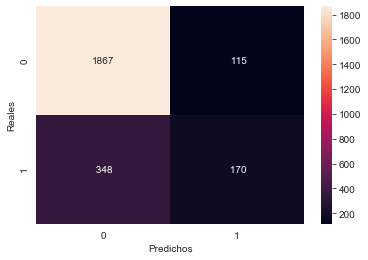

In [42]:

plot=sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [43]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      1982
           1       0.60      0.33      0.42       518

    accuracy                           0.81      2500
   macro avg       0.72      0.64      0.66      2500
weighted avg       0.79      0.81      0.79      2500



In [44]:
y_pred_proba = model_01.predict_proba(X_test_scl)

In [45]:
from sklearn.metrics import roc_curve

In [46]:
fpr,tpr,thr = roc_curve(y_test, y_pred_proba[:,1])

In [47]:
df_roc = pd.DataFrame(dict(fpr_roc=fpr, tpr_roc=tpr, thr_roc= thr))
df_roc

,fpr_roc,tpr_roc,thr_roc
0,0.000000,0.000000,1.998912
1,0.000000,0.001931,0.998912
2,0.000000,0.055985,0.914359
3,0.000505,0.055985,0.895113
4,0.000505,0.063707,0.885822
...,...,...,...
665,0.923310,0.996139,0.021781
666,0.923310,0.998069,0.021746
667,0.943996,0.998069,0.018490
668,0.943996,1.000000,0.018404


In [48]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.423412204234122


In [49]:
import numpy as np
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])


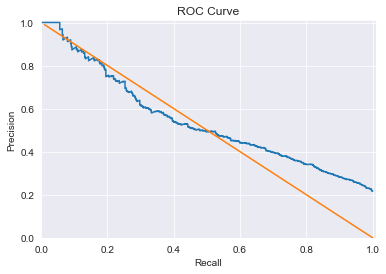

In [50]:
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('ROC Curve')
plt.plot(recall,precision)
plt.plot(np.arange(1,0, step =-0.01), np.arange(0,1, step =0.01))
plt.show()

In [51]:
from sklearn.metrics import auc
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(recall, precision)
lr_f1

0.423412204234122

In [52]:
lr_auc

0.5430545263580266


---
## Evaluación de performance - comentarios:
##### Nuestro objetivo es identificar correctamente la mayor cantidad de clientes que nos estan por abandonar
##### Con esto, realizar acciones de retencion sobre este grupo de personas
##### Como las acciones de retención cuestan dinero, debemos tambien no sobrepasarnos con el grupo de gente a intentar retenar
##### Es un tradeoff entre predecir los clientes que nos dejaran y minimizar los costos de accion de retención
##### A nivel modelo, esto se traduce en una relacion de compromiso entre recall y precision

---
# NAIVE BAYES
###  - modelo con interacción -

In [53]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'relative_Tenure',
       'balance_t_salary', 'balance_zero'],
      dtype='object')

In [54]:
from sklearn.metrics import accuracy_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [55]:
#probamos interacciones 'balance_t_salary','balance_zero','relative_Tenure'

In [56]:
removed_features = ['RowNumber','CustomerId','Surname','Geography','Gender','Exited']

In [57]:
#Armamos los feature y target:
X = data.drop(removed_features, axis = 1)
X_country = pd.get_dummies(data.Geography, drop_first = True, prefix ="Country")
X_gender = pd.get_dummies(data.Gender, drop_first = True, prefix ="Gender")
X_gender
X = pd.concat([X, X_country, X_gender ], axis=1)
y = data.Exited


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

#SCALER
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

In [58]:
# Modelo
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [59]:
param_grid = dict( var_smoothing = np.logspace(0,-9, num = 100) )
print(param_grid)

{'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.84803587e-02, 2.31012970e-02, 1.87381742e-02,
       1.51991108e-02, 1.23284674e-02, 1.00000000e-02, 8.11130831e-03,
       6.57933225e-03, 5.33669923e-03, 4.32876128e-03, 3.51119173e-03,
       2.84803587e-03, 2.31012970e-03, 1.87381742e-03, 1.51991108e-03,
       1.23284674e-03, 1.00000000e-03, 8.11130831e-04, 6.57933225e-04,
       5.33669923e-04, 4.32876128e-04, 3.51119173e-04, 2.84803587e-04,
       2.31012970e-04, 1.87381742e-04, 1.51991108e-04, 1.23284674e-04,
       1.00000000e-04, 8.11130831e-05, 6.57933225e-05, 5.33669923e-05,
       4.32876128e-05, 3.51119173e-05, 2.84803587e-05, 2.31012970e-05,
       1.87381742e-05, 1.51991108e-05, 1.23284674e-05, 1.00

**Esquema de validación cruzada:** definimos la cantidad de folds, con el método `StratifiedKFold`

In [60]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

In [61]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(nb, param_grid, cv=folds, scoring='f1')

In [62]:
grid.fit(X_train_scl, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=19, shuffle=True),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.336699...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='f1')

In [63]:
grid.best_params_['var_smoothing']

0.001

In [64]:
best_var = grid.best_params_['var_smoothing']

In [65]:
model_01 = GaussianNB(var_smoothing = best_var )

In [66]:
#Entreno
model_01.fit(X_train_scl, y_train)

GaussianNB(var_smoothing=0.001)

In [67]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [68]:
print('Recall Train :',recall_score(y_train, model_01.predict(X_train_scl)))

Recall Train : 0.4259381171823568


In [69]:
y_pred = model_01.predict(X_test_scl)

In [70]:
print('Recall Test :',recall_score(y_test,y_pred))

Recall Test : 0.39768339768339767


In [71]:
print('Precision Train :',precision_score(y_train,model_01.predict(X_train_scl)))

Precision Train : 0.521774193548387


In [72]:
print('Precision Test :',precision_score(y_test,y_pred))

Precision Test : 0.5215189873417722


In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(34.0, 0.5, 'Reales')

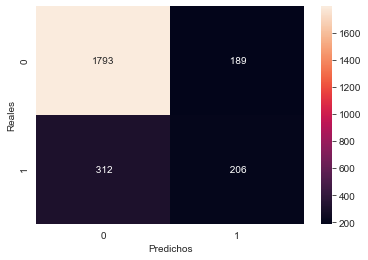

In [74]:

plot=sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [75]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1982
           1       0.52      0.40      0.45       518

    accuracy                           0.80      2500
   macro avg       0.69      0.65      0.66      2500
weighted avg       0.78      0.80      0.79      2500



In [76]:
y_pred_proba = model_01.predict_proba(X_test_scl)

In [77]:
from sklearn.metrics import roc_curve

In [78]:
fpr,tpr,thr = roc_curve(y_test, y_pred_proba[:,1])

In [79]:
df_roc = pd.DataFrame(dict(fpr_roc=fpr, tpr_roc=tpr, thr_roc= thr))
df_roc

,fpr_roc,tpr_roc,thr_roc
0,0.000000,0.000000,1.999134
1,0.000000,0.001931,0.999134
2,0.000000,0.032819,0.992861
3,0.000505,0.032819,0.992022
4,0.000505,0.046332,0.977961
...,...,...,...
673,0.891524,0.996139,0.011248
674,0.891524,0.998069,0.011208
675,0.917255,0.998069,0.009303
676,0.917255,1.000000,0.009279


In [80]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.4512595837897042


In [81]:
import numpy as np
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])


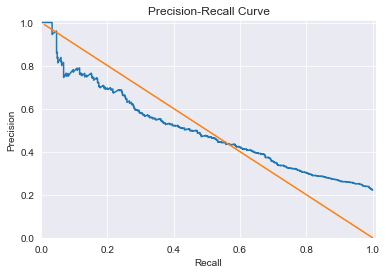

In [82]:
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision-Recall Curve')
plt.plot(recall,precision)
plt.plot(np.arange(1,0, step =-0.01), np.arange(0,1, step =0.01))
plt.show()

In [83]:
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(recall, precision)
lr_f1

0.4512595837897042

In [84]:
lr_auc

0.5012846529279834

---
### Probamos un primer modelo de ensamble:

<a id='RF'></a>

---
# RANDOM FOREST
###  Sin Interacción

<font size="1">[volver al índice](#INDEX)</font>

---

In [85]:
removed_features = ['RowNumber','CustomerId','Surname','Geography','Gender','relative_Tenure','balance_t_salary','balance_zero','Exited']

In [86]:
X = data.drop(removed_features, axis = 1)
X_country = pd.get_dummies(data.Geography, drop_first = True, prefix ="Country")
X_gender = pd.get_dummies(data.Gender, drop_first = True, prefix ="Gender")
X_gender
X = pd.concat([X, X_country, X_gender ], axis=1)

y = data.Exited

#'Geography', 'Gender'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

In [87]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

Grid search para max_depth

In [90]:
# Modelo
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(class_weight = 'balanced')
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [99]:
param_grid = dict( n_estimators=[400,500,700], max_features=[3,4,5,6] )
print(param_grid)



{'n_estimators': [400, 500, 700], 'max_features': [3, 4, 5, 6]}


**Esquema de validación cruzada:** definimos la cantidad de folds, con el método `StratifiedKFold`

In [100]:
from sklearn.model_selection import StratifiedKFold
folds=StratifiedKFold(n_splits=10, random_state=19, shuffle=True)

In [101]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(rf, param_grid, cv=folds, scoring='f1')

In [102]:
grid.fit(X_train_scl, y_train)

KeyboardInterrupt: 

In [97]:
grid.best_params_['n_estimators']

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

In [98]:
grid.best_params_['max_features']

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

---
Los hiperparámetros traidos por GridSearch, son los mejores para la data de TRAIN, con todos sus folds. <br>
Hay parametros como max_depth, y n_estimators, que al crecer mejoraran la precision del modelo en training pero NO necesariamente <br>
la precisión del modelo en test


Si el arbol es lo suficientemente grande, y la data de train es lo suficientemente pequeña, el modelo llegará a aprender de memoria, la totalidad de los datos de train.
En conclusión, si bien GridSearch nos arroja valores optimos para train, validamos luego esto en los datos de test.

---

In [150]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

random_forest = RandomForestClassifier(n_estimators=400, n_jobs=-1,max_features=5, max_depth=15, class_weight = 'balanced')



In [151]:
random_forest.fit(X_train_scl, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, max_features=5,
                       n_estimators=400, n_jobs=-1)

In [152]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [153]:
print('Recall Train :',recall_score(y_train, random_forest.predict(X_train_scl)))

Recall Train : 0.9973666886109283


In [154]:
y_pred = random_forest.predict(X_test_scl)

In [155]:
print('Recall Test :',recall_score(y_test,y_pred))

Recall Test : 0.4826254826254826


In [156]:
print('Precision Train :',precision_score(y_train,random_forest.predict(X_train_scl)))

Precision Train : 0.9831278390655419


In [157]:
print('Precision Test :',precision_score(y_test,y_pred))

Precision Test : 0.7396449704142012


In [158]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(34.0, 0.5, 'Reales')

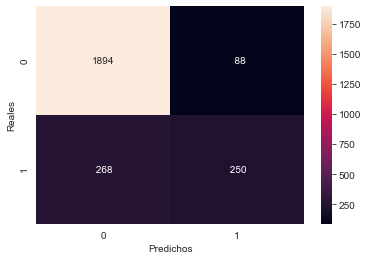

In [159]:

plot=sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [160]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.91      1982
           1       0.74      0.48      0.58       518

    accuracy                           0.86      2500
   macro avg       0.81      0.72      0.75      2500
weighted avg       0.85      0.86      0.85      2500



In [161]:
y_pred_train = random_forest.predict(X_train_scl)

Text(34.0, 0.5, 'Reales')

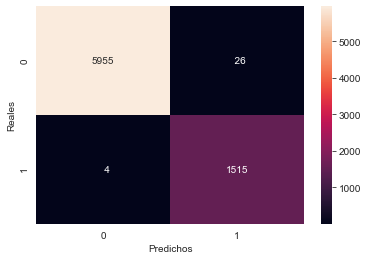

In [162]:
plot=sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [163]:
print (classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5981
           1       0.98      1.00      0.99      1519

    accuracy                           1.00      7500
   macro avg       0.99      1.00      0.99      7500
weighted avg       1.00      1.00      1.00      7500



In [164]:
y_pred_proba = random_forest.predict_proba(X_test_scl)

In [165]:
from sklearn.metrics import roc_curve

In [166]:
fpr,tpr,thr = roc_curve(y_test, y_pred_proba[:,1])

In [167]:
df_roc = pd.DataFrame(dict(fpr_roc=fpr, tpr_roc=tpr, thr_roc= thr))
df_roc

,fpr_roc,tpr_roc,thr_roc
0,0.000000,0.000000,1.984818
1,0.000000,0.001931,0.984818
2,0.000000,0.075290,0.915974
3,0.000505,0.075290,0.915893
4,0.000505,0.090734,0.905307
...,...,...,...
520,0.912210,0.998069,0.007500
521,0.927851,0.998069,0.006286
522,0.927851,1.000000,0.006279
523,0.998991,1.000000,0.000082


In [168]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.5841121495327103


In [169]:
import numpy as np
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])


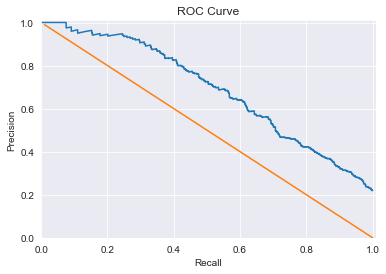

In [170]:
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('ROC Curve')
plt.plot(recall,precision)
plt.plot(np.arange(1,0, step =-0.01), np.arange(0,1, step =0.01))
plt.show()

In [171]:
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(recall, precision)
lr_f1

0.5841121495327103

In [172]:
lr_auc

0.6898146920133172

---
Naive Bayes      F1:0.45  precision-recall AUC: 0.50 <br>
Random Forest     F1:0.58  precision-recall AUC: 0.70 <br>
---

### Graficamos feature importance

In [117]:
random_forest.feature_importances_

array([0.08529489, 0.29916774, 0.04507533, 0.12448285, 0.20684058,
       0.00902019, 0.07422153, 0.0878236 , 0.04230394, 0.00790328,
       0.01786606])

<BarContainer object of 11 artists>

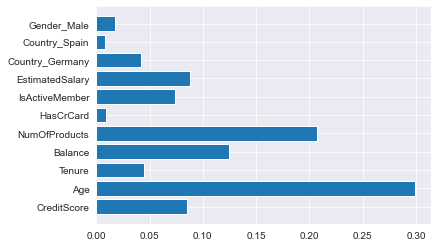

In [118]:
plt.barh(X.columns, random_forest.feature_importances_)

---
# RANDOM FOREST
###  - CON INTERACCION

---

In [119]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'relative_Tenure',
       'balance_t_salary', 'balance_zero'],
      dtype='object')

In [120]:
removed_features = ['RowNumber','CustomerId','Surname','Geography','Gender','Exited']

In [121]:
X = data.drop(removed_features, axis = 1)
X_country = pd.get_dummies(data.Geography, drop_first = True, prefix ="Country")
X_gender = pd.get_dummies(data.Gender, drop_first = True, prefix ="Gender")
X_gender
X = pd.concat([X, X_country, X_gender ], axis=1)

y = data.Exited

#'Geography', 'Gender'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111)

In [122]:
scaler = StandardScaler()
X_train_scl = scaler.fit_transform(X_train)
X_test_scl = scaler.transform(X_test)

Tomamos los parametros devueltos por el Grid search anterior

In [123]:
grid.best_params_['n_estimators']

400

In [124]:
grid.best_params_['max_features']

5

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error

random_forest = RandomForestClassifier(n_estimators=grid.best_params_['n_estimators'], n_jobs=-1,max_features=grid.best_params_['max_features'], max_depth=10 )

#max_depth=grid.best_params_['max_depth'],random_state=42

In [126]:
random_forest.fit(X_train_scl, y_train)

RandomForestClassifier(max_depth=10, max_features=5, n_estimators=400,
                       n_jobs=-1)

In [127]:
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

In [128]:
print('Recall Train :',recall_score(y_train, random_forest.predict(X_train_scl)))

Recall Train : 0.5918367346938775


In [129]:
y_pred = random_forest.predict(X_test_scl)

In [130]:
print('Recall Test :',recall_score(y_test,y_pred))

Recall Test : 0.4498069498069498


In [131]:
print('Precision Train :',precision_score(y_train,random_forest.predict(X_train_scl)))

Precision Train : 0.9423480083857443


In [132]:
print('Precision Test :',precision_score(y_test,y_pred))

Precision Test : 0.8006872852233677


In [133]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(34.0, 0.5, 'Reales')

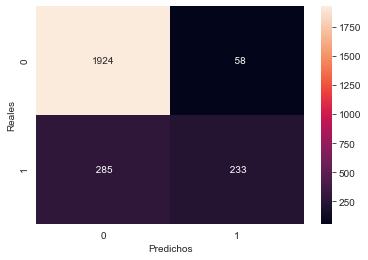

In [134]:

plot=sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [135]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1982
           1       0.80      0.45      0.58       518

    accuracy                           0.86      2500
   macro avg       0.84      0.71      0.75      2500
weighted avg       0.86      0.86      0.85      2500



In [136]:
y_pred_train = random_forest.predict(X_train_scl)

Text(34.0, 0.5, 'Reales')

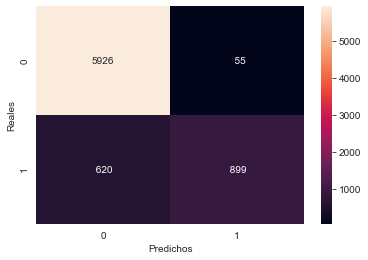

In [137]:
plot=sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [138]:
y_pred_proba = random_forest.predict_proba(X_test_scl)

In [139]:
from sklearn.metrics import roc_curve

In [140]:
fpr,tpr,thr = roc_curve(y_test, y_pred_proba[:,1])

In [141]:
df_roc = pd.DataFrame(dict(fpr_roc=fpr, tpr_roc=tpr, thr_roc= thr))
df_roc

,fpr_roc,tpr_roc,thr_roc
0,0.000000,0.000000,1.975968
1,0.000000,0.001931,0.975968
2,0.000000,0.150579,0.835480
3,0.000505,0.150579,0.828629
4,0.000505,0.166023,0.822365
...,...,...,...
517,0.828456,0.996139,0.025554
518,0.828456,0.998069,0.025370
519,0.915742,0.998069,0.015411
520,0.915742,1.000000,0.015359


In [142]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred))

0.5760197775030902


In [143]:
import numpy as np
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])


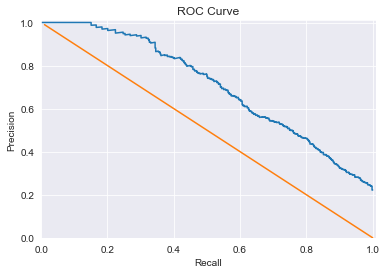

In [144]:
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('ROC Curve')
plt.plot(recall,precision)
plt.plot(np.arange(1,0, step =-0.01), np.arange(0,1, step =0.01))
plt.show()

In [145]:
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(recall, precision)
lr_f1

0.5760197775030902

In [146]:
lr_auc

0.706761192778765

### Graficamos feature importance

In [147]:
random_forest.feature_importances_

array([0.06586917, 0.27785794, 0.02907908, 0.08261067, 0.20952333,
       0.00750018, 0.06731221, 0.06467782, 0.06644889, 0.05702724,
       0.00844438, 0.04068673, 0.00691246, 0.01604991])

<BarContainer object of 14 artists>

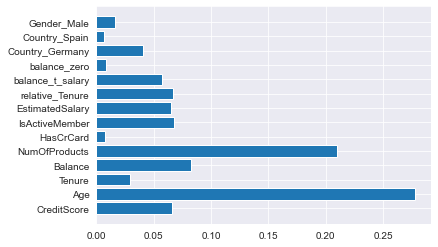

In [148]:
plt.barh(X.columns, random_forest.feature_importances_)

---
<a id='XGB'></a>
# XGBoost 
### - implementación con Pipeline
### - gridsearch de selección de features

<font size="1">[volver al índice](#INDEX)</font>

---


In [149]:
# Imports
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc, f1_score
from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix

# Creamos los dataset de test y train

In [150]:
removed_features_xg = ['RowNumber','CustomerId','Surname','Geography','Gender','Exited']

In [151]:
X = data.drop(removed_features_xg, axis = 1)
X_country = pd.get_dummies(data.Geography, drop_first = True, prefix ="Country")
X_gender = pd.get_dummies(data.Gender, drop_first = True, prefix ="Gender")
X_gender
X = pd.concat([X, X_country, X_gender ], axis=1)

y = data.Exited

#'Geography', 'Gender'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 111, stratify= y)

In [152]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,relative_Tenure,balance_t_salary,balance_zero,Country_Germany,Country_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,84,0.000000e+00,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,41,9.431953e+09,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,336,1.819041e+10,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,39,0.000000e+00,1,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,86,9.925910e+09,0,0,1,0


In [153]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

In [154]:
# Creamos un selector de features
class FeatureSelection(BaseEstimator, TransformerMixin):
    def __init__(self,selected_features):
        self.selected_features=selected_features

    def fit(self,X,y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.selected_features]

In [155]:
# El selector elimina las columnas de interaccion

selector1=FeatureSelection(selected_features=X.drop(columns= ['relative_Tenure', 'balance_t_salary','balance_zero']).columns.values)
selector2=FeatureSelection(selected_features=X.drop(columns= ['relative_Tenure', 'balance_t_salary']).columns.values)
selector3=FeatureSelection(selected_features=X.drop(columns= ['balance_t_salary','balance_zero']).columns.values)
selector4=FeatureSelection(selected_features=X.drop(columns= ['relative_Tenure','balance_zero']).columns.values)


In [156]:
# Pipeline con XGboost 

pasos = [('feature_engineering',selector1), ('scaler', StandardScaler()), ('xgb', XGBClassifier(seed = 20))]

pipe = Pipeline(pasos)

In [157]:
# Vemos los parametros del pipeline
pipe.get_params()

{'memory': None,
 'steps': [('feature_engineering',
   FeatureSelection(selected_features=array(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
          'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
          'Country_Germany', 'Country_Spain', 'Gender_Male'], dtype=object))),
  ('scaler', StandardScaler()),
  ('xgb',
   XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
                 colsample_bynode=None, colsample_bytree=None, gamma=None,
                 gpu_id=None, importance_type='gain', interaction_constraints=None,
                 learning_rate=None, max_delta_step=None, max_depth=None,
                 min_child_weight=None, missing=nan, monotone_constraints=None,
                 n_estimators=100, n_jobs=None, num_parallel_tree=None,
                 random_state=None, reg_alpha=None, reg_lambda=None,
                 scale_pos_weight=None, seed=20, subsample=None, tree_method=None,
                 validate_parameters=None, verbosity=

In [158]:
# Usamos Cross Validation

folds=StratifiedKFold(n_splits=5,shuffle=True, random_state=24)

# Le damos la grilla de parametros a GridSearch

param_grid = [{'feature_engineering' :[selector1, selector2, selector3, selector4, None],'scaler':[StandardScaler(),MinMaxScaler()],
               'xgb__n_estimators': [40,50,60],
               'xgb__learning_rate':[0.1,0.15,0.2], 
               'xgb__max_depth':[5,6,7], 
               'xgb__colsample_bytree':[0.7,0.8,0.9],
                'xgb__subsample': np.arange(0.5, 1.0, 0.1), 
               'xgb__colsample_bylevel': np.arange(0.4, 1.0, 0.1)}]

In [159]:
# Creamos el GridSeach
grid_xg = GridSearchCV(pipe, param_grid, cv= folds, scoring ='f1')

In [160]:
# Entrenamos
grid_xg.fit(X_train, y_train)

/Users/albanosanturio/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/albanosanturio/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/albanosanturio/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do

[16:11:55] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:11:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/albanosanturio/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/albanosanturio/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:11:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/albanosanturio/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/albanosanturio/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:11:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/albanosanturio/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/albanosanturio/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:11:56] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/albanosanturio/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/albanosanturio/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:11:57] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=24, shuffle=True),
             estimator=Pipeline(steps=[('feature_engineering',
                                        FeatureSelection(selected_features=array(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Country_Germany', 'Country_Spain', 'Gender_Male'], dtype=object))),
                                       ('scaler', StandardS...
             param_grid=[{'feature_engineering': [FeatureSelection(selected_features=array(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'balance_zero',
       'Country_Germany', 'Country_Spain', 'Gender_Male'], dtype=object))],
                          'scaler': [StandardScaler()],
                          'xgb__colsample_bylevel': [0.8999999999999999],
                          'xgb__colsample_bytree': [0.8],
                          'xgb__le

In [161]:
# Vemos los mejores hiperparametros

grid_xg.best_params_

{'feature_engineering': FeatureSelection(selected_features=array(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
        'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'balance_zero',
        'Country_Germany', 'Country_Spain', 'Gender_Male'], dtype=object)),
 'scaler': StandardScaler(),
 'xgb__colsample_bylevel': 0.8999999999999999,
 'xgb__colsample_bytree': 0.8,
 'xgb__learning_rate': 0.15,
 'xgb__max_depth': 6,
 'xgb__n_estimators': 50,
 'xgb__subsample': 0.6}

In [162]:
# Vemos el mejor estimador
grid_xg.best_estimator_.steps

[('feature_engineering',
  FeatureSelection(selected_features=array(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
         'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'balance_zero',
         'Country_Germany', 'Country_Spain', 'Gender_Male'], dtype=object))),
 ('scaler', StandardScaler()),
 ('xgb',
  XGBClassifier(base_score=0.5, booster='gbtree',
                colsample_bylevel=0.8999999999999999, colsample_bynode=1,
                colsample_bytree=0.8, gamma=0, gpu_id=-1, importance_type='gain',
                interaction_constraints='', learning_rate=0.15, max_delta_step=0,
                max_depth=6, min_child_weight=1, missing=nan,
                monotone_constraints='()', n_estimators=50, n_jobs=8,
                num_parallel_tree=1, random_state=20, reg_alpha=0, reg_lambda=1,
                scale_pos_weight=1, seed=20, subsample=0.6, tree_method='exact',
                validate_parameters=1, verbosity=None))]

In [163]:
y_pred_train = grid_xg.best_estimator_.predict(X_train)

y_pred_test = grid_xg.best_estimator_.predict(X_test)

/Users/albanosanturio/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(
/Users/albanosanturio/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [164]:
f1_score(y_train, y_pred_train)

0.7011764705882354

In [165]:
# Analisis de los recall

In [166]:
print('Recall Train :',recall_score(y_train, y_pred_train))

Recall Train : 0.5850785340314136


In [167]:
print('Recall Train :',recall_score(y_test, y_pred_test))

Recall Train : 0.46954813359528486


In [168]:
# Analisis de precision

In [169]:
print('Precision Train :',precision_score(y_train, y_pred_train))

Precision Train : 0.8747553816046967


In [170]:
print('Precision Test :',precision_score(y_test, y_pred_test))

Precision Test : 0.7177177177177178


Text(34.0, 0.5, 'Reales')

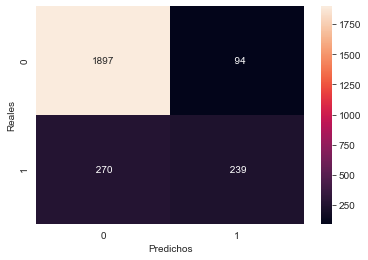

In [171]:
plot=sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [172]:
print (classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1991
           1       0.72      0.47      0.57       509

    accuracy                           0.85      2500
   macro avg       0.80      0.71      0.74      2500
weighted avg       0.84      0.85      0.84      2500



In [173]:
# Analisis curva precision recall


y_pred_proba_xg = grid_xg.best_estimator_.predict_proba(X_test)

/Users/albanosanturio/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [174]:
import numpy as np
from sklearn.metrics import precision_recall_curve
precision_xg, recall_xg, thresholds = precision_recall_curve(y_test, y_pred_proba_xg[:,1])

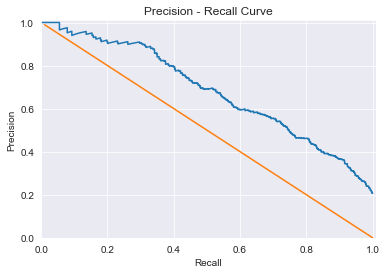

In [175]:
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.title('Precision - Recall Curve')
plt.plot(recall_xg,precision_xg)
plt.plot(np.arange(1,0, step =-0.01), np.arange(0,1, step =0.01))
plt.show()

In [176]:
lr_auc_xg = auc(recall_xg, precision_xg)
print("Area Bajo la curva precision - recall ", lr_auc_xg)

Area Bajo la curva precision - recall  0.684058569972529


----

In [177]:
# Para obtener Feature importances 
model = XGBClassifier(base_score=0.5, booster=None ,
                               colsample_bylevel=0.8999999,
                               gamma=0, gpu_id=-1, importance_type='gain',
                               interaction_constraints='', learning_rate=0.15,
                               max_delta_step=0, max_depth=6,
                               min_child_weight=1, missing=None,
                               monotone_constraints='()', n_estimators=50,
                               n_jobs=4, num_parallel_tree=1, random_state=20,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=20, subsample=0.8999999999999999,
                               tree_method='exact', validate_parameters=1,
                               verbosity=None)

In [178]:
X_model = X.drop(columns = ['relative_Tenure', 'balance_t_salary'], axis = 1)


X_train_model, X_test_model, y_train_model, y_test_model = train_test_split(X_model, y, random_state = 111, stratify= y)

In [179]:
scaler = StandardScaler()

X_train_model_scl = scaler.fit_transform(X_train_model)
X_test_model_scl  = scaler.fit(X_test_model)

In [180]:
model.fit(X_train_model_scl,y_train_model)

[16:11:58] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/albanosanturio/opt/anaconda3/envs/dhdsblend2021/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8999999,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, random_state=20,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=20,
              subsample=0.8999999999999999, tree_method='exact',
              validate_parameters=1, verbosity=None)

<BarContainer object of 12 artists>

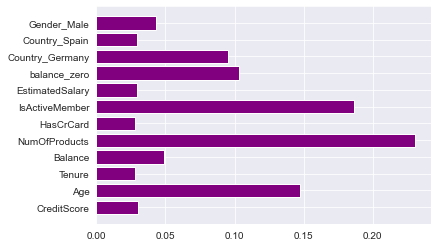

In [181]:
plt.barh(X_model.columns, model.feature_importances_, color = 'purple')


---
<a id='PKL'></a>
# Export del modelo (serialización)

Exportamos ambos modelos de ensamble, dada su similar performance

<font size="1">[volver al índice](#INDEX)</font>

---

In [182]:

import pickle

with open('xgb_model.pkl', 'wb') as xg:
    pickle.dump(model, xg)

with open('rf_model.pkl', 'wb') as rf:
    pickle.dump(random_forest, rf)    


---
<a id='SUM'></a>
# Resumen - Comentarios finales

<font size="1">[volver al índice](#INDEX)</font>

---


Los siguientes son los resultados de los modelos entrenados:<BR>
<BR>
Naive Bayes sin interacción  $\;\;\;\;\;\;\;\;\;\;\;$    F1: 0.42 $\;\;\;$  precision-recall AUC: 0.54 <br>
Naive Bayes con interacción   $\;\;\;\;\;\;\;\;\;\;$  F1: 0.45 $\;\;\;$   precision-recall AUC: 0.50 <br>
<br>
Random Forest sin interacción  $\;\;\;\;\;\;\;$  F1: 0.58 $\;\;\;$   precision-recall AUC: 0.69 <br>
Random Forest con interacción  $\;\;\;\;\;\;$  F1: 0.57 $\;\;\;$   precision-recall AUC: 0.70 <br>
<br>
XGBoost modelo final $\;\;\;\;\;\;$  F1: 0.57 $\;\;\;$   precision-recall AUC: 0.68 <br>


Ambos modelos de ensamle suponen una mejora significativa del modelo base <br>
Inicialmente avanzamos con el XGBoost por ser este el modelo implementado robustamente con pipelines y con mayor tuning de hiperparámetros <br>
#### Next Steps:
1.Implementar Pipeline y mayor tuning de hiperparámetros para random forest<br>
2.Aplicar una estrategia de resampling para compensar el efecto de dataset desbalanceado<br>
3.Testear un mayor numero de columnas de interacción<br>
---